# Exercise M5.02

The aim  of this exercise is to find out whether a decision tree model is able to extrapolate.

By extrapolation, we refer to values predicted by a model outside of the range of  feature values seen during the training.

In [2]:
import pandas as pd
import numpy as np

penguins = pd.read_csv('data/penguins_regression.csv')
data = ['Flipper Length (mm)']
target = 'Body Mass (g)'

data_train, target_train = penguins[data], penguins[target]

First, create two models, a linear regression model and a decision tree regression model, and fit them on the training data. Limit the depth at 3 levels for the decision tree.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

np.random_state = 23

# model initiation
lin_model = LinearRegression()
dt_model = DecisionTreeRegressor(max_depth=3)

# model fitting
lin_model.fit(data_train, target_train)
dt_model.fit(data_train, target_train)


DecisionTreeRegressor(max_depth=3)

Create a testing dataset, ranging from the minimum to the maximum of the flipper length of the training dataset. Get the predictions of each model using this test dataset

In [6]:
data_test = pd.DataFrame(np.arange(data_train[data[0]].min(),
                                   data_train[data[0]].max()),
                         columns=data)

In [15]:
predicted_lin_reg = lin_model.predict(data_test)
predicted_dt = dt_model.predict(data_test)

Create a scatter plot containing the training samples and superimpose the predictions of both model on the top

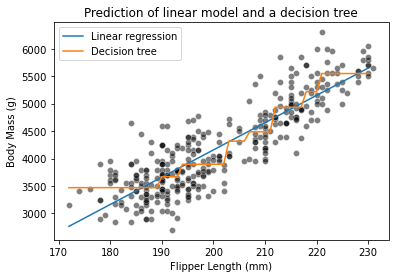

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, predicted_lin_reg,
         label="Linear regression")
plt.plot(data_test, predicted_dt, label="Decision tree")
plt.legend()
_ = plt.title("Prediction of linear model and a decision tree")

The predictions that we got were within the range of feature values seen during training. In some sense, we observe the capabilities of our model to interpolate.

Now, we will check the extrapolation capabilities of each model.  
Create a dataset containing the value of the previous dataset. Besides, add values below and above the minimum and the maximum of the flipper length seen during training.

In [17]:
offset = 30
data_test = pd.DataFrame(np.arange(data_train[data[0]].min() - offset,
                                   data_train[data[0]].max() + offset),
                         columns=data)

Finally, we predict using both models on this new testing set.

In [18]:
predicted_lin_reg = lin_model.predict(data_test)
predicted_dt = dt_model.predict(data_test)

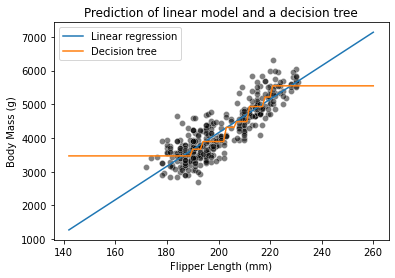

In [19]:
sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, predicted_lin_reg,
         label="Linear regression")
plt.plot(data_test, predicted_dt, label="Decision tree")
plt.legend()
_ = plt.title("Prediction of linear model and a decision tree")

The linear model will extrapolate using the fitted model for flipper lengths < 175 mm and > 235 mm. In fact, we are using the model parametrization to make this predictions.

As mentioned, decision trees are non-parametric models and we observe that they cannot extrapolate. For flipper lengths below the minimum, the mass of the penguin in the training data with the shortest flipper length will always be predicted. Similarly, for flipper lengths above the maximum, the mass of the penguin in the training data with the longest flipper will always be predicted.